<a href="https://colab.research.google.com/github/KevinaZeni/House_Price_Prediction/blob/main/House_Prediction_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House_Prediction_Regression_Analysis

##**Overview**

Hass Consulting Company is a real estate leader with over 25 years of experience. As a Data Scientist, you have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

**Data Glossary**

Below is the dataset glossary:

Id 
price  - Price of the house
bedrooms - Number of Bedrooms
bathrooms - Number of Bathrooms
sqft_living - Square feet area of living area
sqft_lot  - Square feet area of parking Layout
floors - Number of Floors
waterfront - Whether waterfront is there or not
view - Number of Views
grade - Grades
sqft_above
sqft_basement - Square feet area off basement
yr_built - Year the house is built
yr_renovated - Year the house is renovated
zipcode - zipcode os the house
lat : Latitude of the house
lon : Longitude of the house
sqft_living15
sqft_lot15

**Defining the research question**

As a Data Scientist, you have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

**Metrics of Success**

Being able to create models that accurately predict the price of houses using the data provided

**Models**



*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression




**Experimental Design Steps**

Data Preparation, Perform univariate, bivariate and multivariate analysis recording your observations.
Performing regression analysis.
Incorporate categorical independent variables into your models.
Check for multicollinearity
Provide a recommendation based on your analysis. 
Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
Challenge your solution by providing insights on how you can make improvements in model improvement.

#**Data Preparation**

**Importing our libraries**

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

**Previewing our dataset**

In [2]:
#Loading our dataset

housing = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

#Previewing the first ten records in our dataset
housing.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
#Previewing the last ten records of our dataset
housing.tail(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


**Basic information about or dataset**

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
#Exploring the columns in our dataset
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
##Checking for uniques values in our variables
housing.nunique()


id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [7]:
housing.shape

(21613, 20)

#**Data Cleaning**

checking for null values in our data

In [8]:
housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in our dataset

Checking for duplicated data

In [9]:
housing.duplicated().sum()

3

In [10]:
##Dealing with our duplicated records

housing= housing.drop_duplicates()

Dropping columns we don't need

In [11]:
housing.drop(columns = ['id'], inplace= True)

Variable types

In [12]:
#Listing our numerical variables

numerical = [feature for feature in housing.columns if housing[feature].dtypes != 'float']

print('Number of numerical variables:', len(numerical))

#Visualizing the numerical variables
housing[numerical].head()

Number of numerical variables: 14


,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1180,5650,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,3,2570,7242,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2,770,10000,0,0,3,6,770,0,1933,0,98028,2720,8062
3,4,1960,5000,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,3,1680,8080,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [13]:
# Listing our float variables
float_ = [feature for feature in housing.columns if housing[feature].dtypes != 'int']

print('Number of float variables:', len(float_))

#Visualizing the numerical variables
housing[float_].head()

Number of float variables: 5


,price,bathrooms,floors,lat,long
0,221900.0,1.00,1.0,47.5112,-122.257
1,538000.0,2.25,2.0,47.7210,-122.319
2,180000.0,1.00,1.0,47.7379,-122.233
3,604000.0,3.00,1.0,47.5208,-122.393
4,510000.0,2.00,1.0,47.6168,-122.045


In [14]:
#Listing our categorical variables
Cat_ = [feature for feature in housing.columns if housing[feature].dtypes == 'O']

print('Number of categorical variables:', len(Cat_))




Number of categorical variables: 0


In [15]:
##We will convert our float variables into int since regression models support int dtypes

#housing['price']=pd.to_numeric(housing['price'], errors='coerce')

for column in housing.columns:
    if housing[column].dtype == 'float':
        housing[column] = housing[column].astype(np.int)
        

In [16]:
housing.dtypes

price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
zipcode          int64
lat              int64
long             int64
sqft_living15    int64
sqft_lot15       int64
dtype: object

Detecting and dealing with outliers

In [17]:
#print('The max_threshold is:', housing.quantile(.95))
#print('The min_threshold is:', housing.quantile(.05))

min_threshold = .05
max_threshold = .95
quant_df = housing.quantile([min_threshold, max_threshold])
print(quant_df)

          price  bedrooms  bathrooms  ...   long  sqft_living15  sqft_lot15
0.05   210000.0       2.0        1.0  ... -122.0         1140.0      1998.9
0.95  1160000.0       5.0        3.0  ... -121.0         3300.0     37064.6

[2 rows x 19 columns]


In [18]:
##Lets remove the outliers
##housing = housing.apply(lambda x: x[(x>quant_df.loc[min_threshold,x.name]) & 
##                                    (x < quant_df.loc[max_threshold,x.name])], axis=0)

#Removing our outliers caused a big variation in our analysis hence we chose to keep them

In [19]:
housing.shape
##Our dataset has the shape outlined below meaning only three records did not meet the thresholds we specified

(21610, 19)

In [20]:
housing.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47,-122,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47,-122,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47,-122,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47,-122,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47,-122,1800,7503
5,1230000,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47,-122,4760,101930
6,257500,3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47,-122,2238,6819
7,291850,3,1,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47,-122,1650,9711
8,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47,-122,1780,8113
9,323000,3,2,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47,-122,2390,7570


#**Exploratory Data Analysis**

**a) Univariate Analysis**

In [21]:
##Checking the descriptive summary of our analysis
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.0,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,1.749745,2079.881212,1.510829e+04,1.446136,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.0,-121.931745,1986.518695,12769.031976
std,3.673876e+05,0.930110,0.734902,918.500299,4.142323e+04,0.551893,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.0,0.252190,685.425781,27305.972464
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.0,-122.000000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.000000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.0,-122.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.619000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.0,-122.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.0,-122.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.0,-121.000000,6210.000000,871200.000000


Measures of Central Tendancy

In [22]:
#MEAN
cols = housing.columns

for i, col_val in enumerate(cols):
 print('The mean of ' + str(col_val) + ' ' + 'is' + ' ' + str(housing[col_val].mean()))


The mean of price is 540178.9448403517
The mean of bedrooms is 3.370846830171217
The mean of bathrooms is 1.7497454881999075
The mean of sqft_living is 2079.881212401666
The mean of sqft_lot is 15108.289819527996
The mean of floors is 1.4461360481258676
The mean of waterfront is 0.007542804257288292
The mean of view is 0.23419713095788985
The mean of condition is 3.4094400740397965
The mean of grade is 7.656779268857011
The mean of sqft_above is 1788.3478944932901
The mean of sqft_basement is 291.53331790837575
The mean of yr_built is 1971.0036094400741
The mean of yr_renovated is 84.3223507635354
The mean of zipcode is 98077.9456732994
The mean of lat is 47.0
The mean of long is -121.93174456270245
The mean of sqft_living15 is 1986.5186950485886
The mean of sqft_lot15 is 12769.031975937067


In [23]:
# MEDIAN

cols = housing.columns

for i, col_val in enumerate(cols):
 print('The median of ' + str(col_val) +' ' + 'is' + ' ' + str(housing[col_val].median()))

The median of price is 450000.0
The median of bedrooms is 3.0
The median of bathrooms is 2.0
The median of sqft_living is 1910.0
The median of sqft_lot is 7619.0
The median of floors is 1.0
The median of waterfront is 0.0
The median of view is 0.0
The median of condition is 3.0
The median of grade is 7.0
The median of sqft_above is 1560.0
The median of sqft_basement is 0.0
The median of yr_built is 1975.0
The median of yr_renovated is 0.0
The median of zipcode is 98065.0
The median of lat is 47.0
The median of long is -122.0
The median of sqft_living15 is 1840.0
The median of sqft_lot15 is 7620.0


In [24]:
# MODE
cols = housing.columns

for i, col_val in enumerate(cols):
 print('The mode of ' + str(col_val) + ' ' + 'is' + ' ' + str(housing[col_val].mode()))

The mode of price is 0    350000
1    450000
dtype: int64
The mode of bedrooms is 0    3
dtype: int64
The mode of bathrooms is 0    2
dtype: int64
The mode of sqft_living is 0    1300
dtype: int64
The mode of sqft_lot is 0    5000
dtype: int64
The mode of floors is 0    1
dtype: int64
The mode of waterfront is 0    0
dtype: int64
The mode of view is 0    0
dtype: int64
The mode of condition is 0    3
dtype: int64
The mode of grade is 0    7
dtype: int64
The mode of sqft_above is 0    1300
dtype: int64
The mode of sqft_basement is 0    0
dtype: int64
The mode of yr_built is 0    2014
dtype: int64
The mode of yr_renovated is 0    0
dtype: int64
The mode of zipcode is 0    98103
dtype: int64
The mode of lat is 0    47
dtype: int64
The mode of long is 0   -122
dtype: int64
The mode of sqft_living15 is 0    1540
dtype: int64
The mode of sqft_lot15 is 0    5000
dtype: int64


In [25]:
##RANGE
cols = housing.columns

for i, col_val in enumerate(cols):
 print('The range of ' + str(col_val) + ' ' + 'is' + ' ' + str(housing[col_val].max() - housing[col_val].min()))

The range of price is 7625000
The range of bedrooms is 33
The range of bathrooms is 8
The range of sqft_living is 13250
The range of sqft_lot is 1650839
The range of floors is 2
The range of waterfront is 1
The range of view is 4
The range of condition is 4
The range of grade is 12
The range of sqft_above is 9120
The range of sqft_basement is 4820
The range of yr_built is 115
The range of yr_renovated is 2015
The range of zipcode is 198
The range of lat is 0
The range of long is 1
The range of sqft_living15 is 5811
The range of sqft_lot15 is 870549


In [26]:
##SKEWNESS

cols = housing.columns

for i, col_val in enumerate(cols):
 print('The skewness of ' + str(col_val) + ' ' + 'is' + ' ' + str(housing[col_val].skew()))

The skewness of price is 4.021467451317612
The skewness of bedrooms is 1.9742435470953739
The skewness of bathrooms is 0.9021208866389637
The skewness of sqft_living is 1.4715321846904306
The skewness of sqft_lot is 13.059170061304911
The skewness of floors is 0.7265579373179887
The skewness of waterfront is 11.384299669126701
The skewness of view is 3.396871876044005
The skewness of condition is 1.0327885174007136
The skewness of grade is 0.7712970436226934
The skewness of sqft_above is 1.4467579401958504
The skewness of sqft_basement is 1.5778143003083518
The skewness of yr_built is -0.469822900099242
The skewness of yr_renovated is 4.55197398329985
The skewness of zipcode is 0.40553301628516
The skewness of lat is 0
The skewness of long is 3.4242854404707783
The skewness of sqft_living15 is 1.1082901797966638
The skewness of sqft_lot15 is 9.506129480452218


In [27]:
#KURTOSIS

cols = housing.columns

for i, col_val in enumerate(cols):
 print('The kurtosis of ' + str(col_val) + ' ' + 'is' + ' ' + str(housing[col_val].kurt()))

The kurtosis of price is 34.517437729615054
The kurtosis of bedrooms is 49.06010825423431
The kurtosis of bathrooms is 1.9893616645626904
The kurtosis of sqft_living is 5.242222911342459
The kurtosis of sqft_lot is 285.0406214916321
The kurtosis of floors is -0.5508017231881506
The kurtosis of waterfront is 127.6140895994763
The kurtosis of view is 10.9021183028132
The kurtosis of condition is 0.5256882874168287
The kurtosis of grade is 1.1910898336094307
The kurtosis of sqft_above is 3.4020083332111235
The kurtosis of sqft_basement is 2.714885503607166
The kurtosis of yr_built is -0.657206754017591
The kurtosis of yr_renovated is 18.723732852671997
The kurtosis of zipcode is -0.8536037850656655
The kurtosis of lat is 0
The kurtosis of long is 9.726630966478673
The kurtosis of sqft_living15 is 1.5970089685116453
The kurtosis of sqft_lot15 is 150.74327525589925


**Univariate Analysis Summary**

We can deduce the following about our dataset from the univariate analysis above

*   Most distributions of our data are positively skewed meaning  most of our data is skewed to the right: Mean ≥ Median > Mode


**b) Bivariate Analysis**

We will find the distribution and try to discover relationships between our features

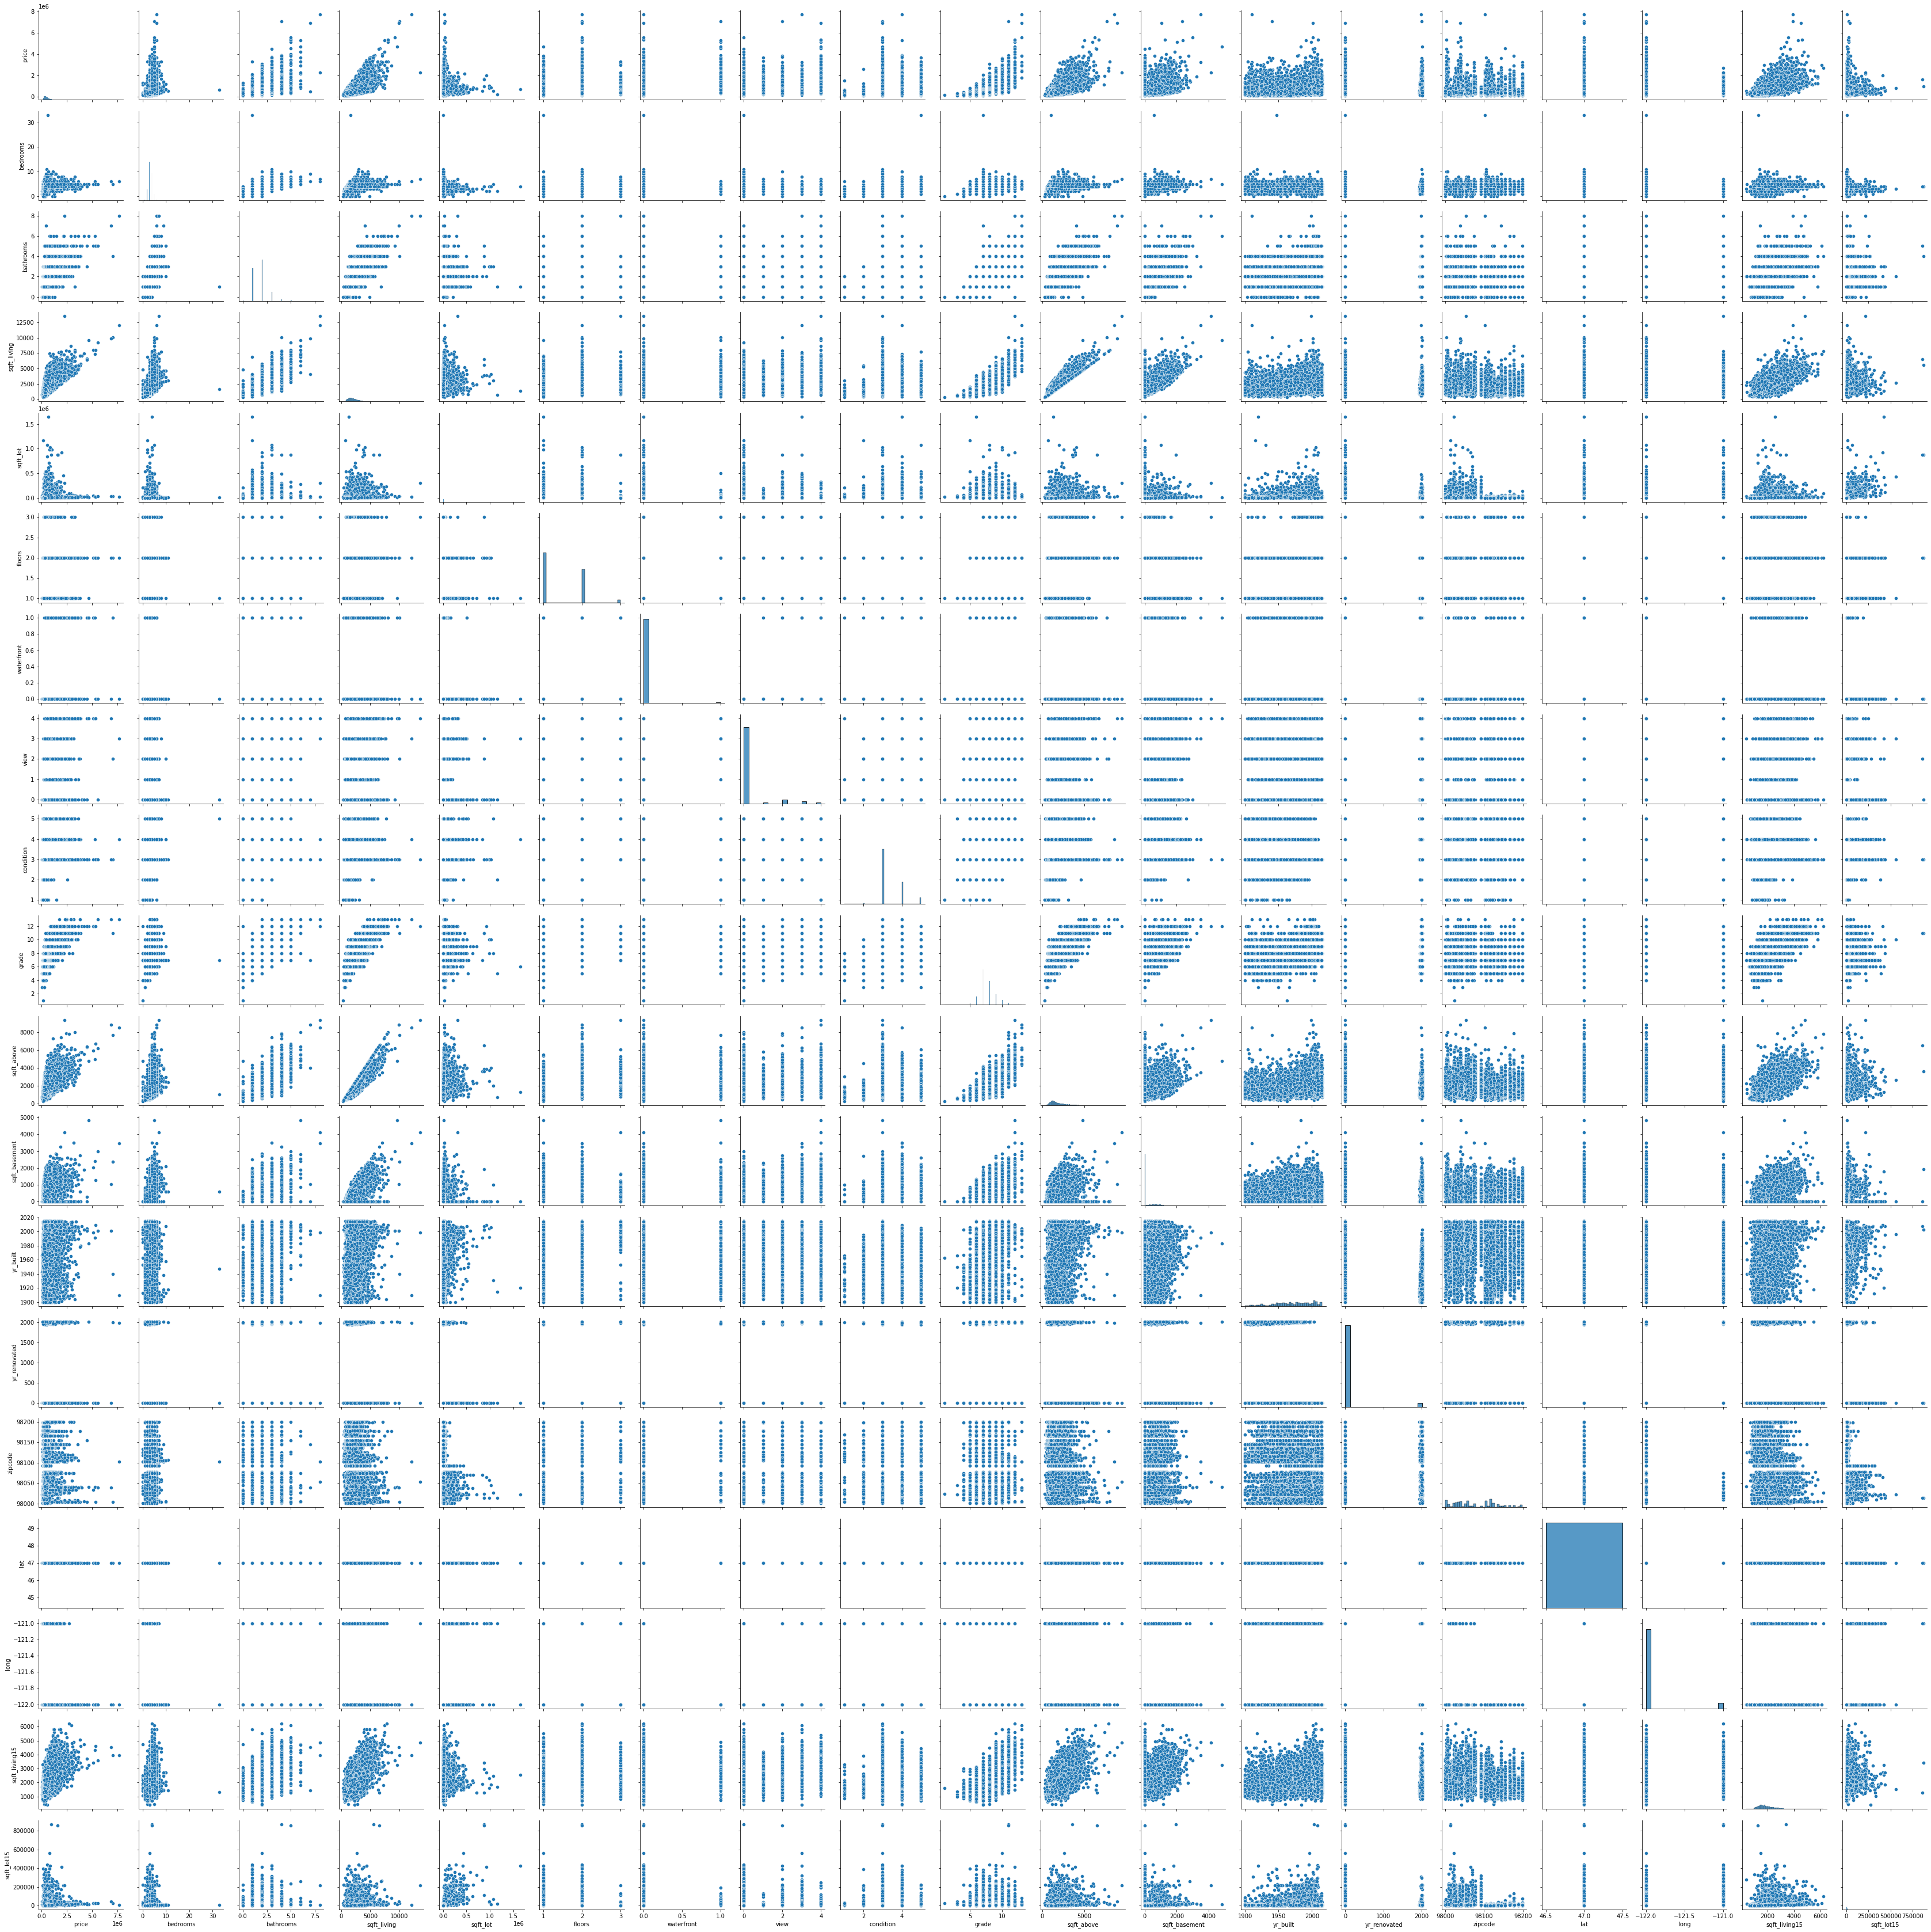

In [28]:
sns.pairplot(housing)
plt.show()

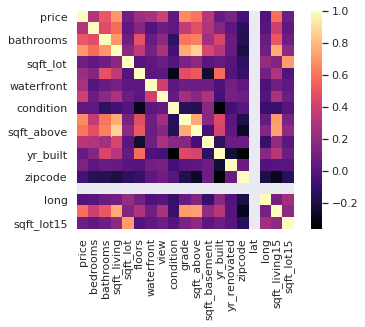

In [29]:
##We will use a heatmap to visualise the correlation
corr = housing.corr()
sns.set(font_scale=1)
sns.heatmap(corr,vmax=1, cmap= 'magma', square=True)
plt.show()

In [30]:
corr_list= corr['price'].sort_values(axis=0,ascending=False)
corr_list

price            1.000000
sqft_living      0.702046
grade            0.667478
sqft_above       0.605569
sqft_living15    0.585382
bathrooms        0.510096
view             0.397466
sqft_basement    0.323849
bedrooms         0.308346
waterfront       0.266332
floors           0.237215
yr_renovated     0.126503
sqft_lot         0.089658
sqft_lot15       0.082457
yr_built         0.053980
condition        0.036397
long            -0.014859
zipcode         -0.053162
lat                   NaN
Name: price, dtype: float64

We will find the relationship between feature variables compares to the target variable y(Price)

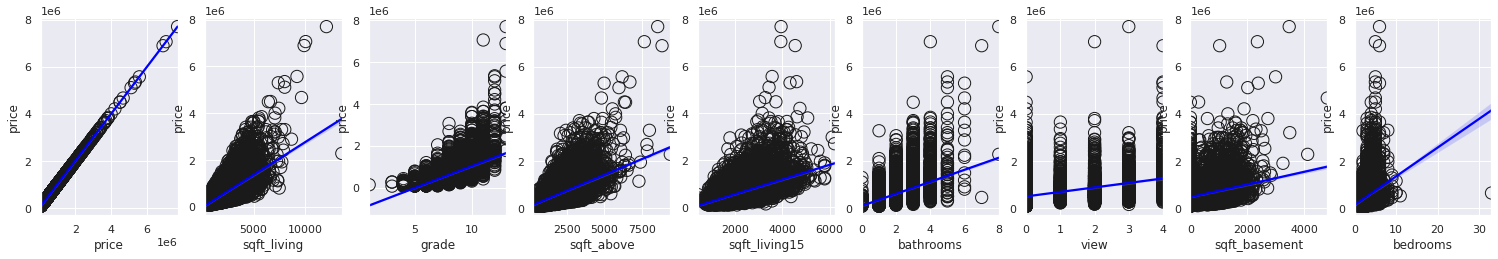

In [31]:
##Using a scatterplot

import matplotlib.pyplot as plt

plt.figure(figsize=(26,8))
for i in range (9):
  z = '29'+str(i+1)
  plt.subplot(z)
  feature = corr_list.index.values[i]
  plt.scatter(housing[feature],housing['price'],facecolors='none', color= 'orange', edgecolors='k', s=150)
  sns.regplot(x=feature, y = 'price', data = housing, scatter=False, color= 'Blue')
   
  #plt.show()
  

**Bivariate Analysis Summaries**

From our bivariate analysis, we have been able to get a glimpse of features most correlated with the target predictor (Price), which are 

*   sqft_living      
*   grade            
*   sqft_above       
*   sqft_living15    
*   bathrooms        
*   view             
*   sqft_basement    
*   bedrooms         
*   waterfront       
*   floors           
*   yr_renovated     
*   sqft_lot         
*   sqft_lot15       
*   yr_built         
*   condition

These could possibly serve as our features when building our prediction models but we will have to do further analysis aand engineering to confirm this.   



   

**Multivariate Analysis**

In [32]:
#We will perform LDA to find the features most important for our models

In [33]:
df=housing.copy()

In [34]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [35]:
##Defining our variables

X = df.drop(columns= ['price'])
y = df.price

In [36]:
#Import linear Doscriminant analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#create an instance of LDA
lda=LDA()
lda_=lda.fit(X,y)
lda_x=lda_.transform(X)
lda_.coef_

array([[-2.62620515e+00, -3.79136269e+00,  2.14311603e-03, ...,
         1.30676983e+01,  5.70908138e-05,  1.78701908e-05],
       [-8.24799698e-01,  7.05859631e-01, -7.47666205e-04, ...,
        -1.42024145e+00,  3.45509770e-03,  2.72870737e-06],
       [-2.32517207e+00, -2.15583244e+00,  8.23845375e-04, ...,
         1.53473616e+01,  2.43433589e-04, -2.21774091e-05],
       ...,
       [-6.48144419e+00,  1.01577992e+01,  1.55946531e-02, ...,
        -7.26383268e+00, -9.52577033e-03,  3.26970383e-06],
       [-7.96038914e+00, -2.90791506e+00,  2.21644998e-02, ...,
        -4.91476296e+00, -8.77802210e-03, -7.03675603e-05],
       [-1.05560127e+01,  1.09443981e+01,  2.29932947e-02, ...,
        -3.28890910e+00, -1.31196651e-02, -8.41455570e-05]])

In [37]:
#creating a dataframe to get the name of the columns and their  coefficients
df2=pd.DataFrame(index=X.columns.values,data=lda_.coef_[0].T)
df2.sort_values(0,ascending=False)

,0
long,1.306770e+01
floors,6.575935e-01
yr_built,1.294001e-01
sqft_living,2.143116e-03
sqft_above,1.505854e-03
sqft_basement,1.371758e-03
sqft_living15,5.709081e-05
sqft_lot15,1.787019e-05
lat,4.152360e-16
sqft_lot,-1.120690e-05


#**Feature engineering**

Importing our libraries

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import warnings
warnings.filterwarnings('ignore')


In [39]:
## We need to split the data first then apply feature engineering to prevent data leakage
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 0)

In [40]:
## Confirming there are no nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))
else:
    print("The dataset has no missing values")

The dataset has no missing values


In [41]:
##Confirming our dtypes
df.dtypes

price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
zipcode          int64
lat              int64
long             int64
sqft_living15    int64
sqft_lot15       int64
dtype: object

#**Building our Models**

**Multilinear Regression Model**

Linear regression models are sensitive to multicollinearity hence we need to check whether the features are collinear.Multi-collinearity is particularly undesirable because it impacts the interpretability of linear regression models


In [42]:
df.drop(columns = ['lat'], inplace = True)

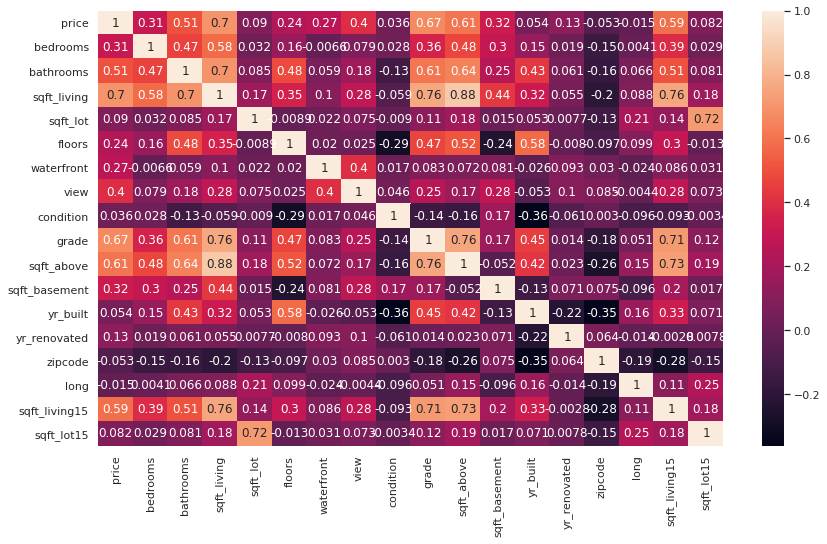

In [43]:
##We will use the VIF to check for multicolliniearity


correlations = df.corr()

sns.set_style('dark')
plt.subplots(figsize =  (14,8))
sns.heatmap(correlations, annot = True)
plt.show()

In [44]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,long,sqft_living15,sqft_lot15
price,2.908755,0.287205,-0.314806,-5.694333e-01,-0.001432,-0.104640,-0.395888,-0.263952,-0.102884,-1.108887,-5.385600e-01,-3.004249e-01,0.823418,-0.032052,0.013078,0.065422,-0.142824,0.107263
bedrooms,0.287205,1.651138,-0.317907,-8.837800e-01,0.047254,0.065823,0.024422,0.078066,-0.072460,0.187152,-2.720079e-01,-1.644963e-01,0.107072,0.020164,0.090304,0.062794,0.021529,0.094865
bathrooms,-0.314806,-0.317907,2.444377,-1.598150e+00,-0.026861,-0.509582,0.059402,-0.008072,-0.028310,-0.052874,5.583236e-01,1.128548e-01,-0.502439,-0.155559,-0.028013,0.008069,0.173269,0.036519
sqft_living,-0.566624,-0.881800,-1.596583,1.809848e+13,-0.120890,-0.045417,-0.008769,0.090921,-0.359413,-1.525132,-1.631796e+13,-8.721092e+12,0.681621,0.213813,-0.118295,-0.348066,-1.408000,-0.103776
sqft_lot,-0.001432,0.047254,-0.026861,-1.224391e-01,2.095830,0.072421,0.026732,-0.056514,0.023992,-0.024156,-1.048923e-01,3.006396e-02,0.046461,0.015514,0.053111,-0.070569,0.142649,-1.459919
floors,-0.104640,0.065823,-0.509582,-4.235686e-02,0.072421,2.149757,0.008735,-0.030438,0.083927,-0.286988,-3.812626e-01,5.511391e-01,-0.828106,-0.127110,-0.258519,-0.030506,0.247989,0.116790
waterfront,-0.395888,0.024422,0.059402,-8.458726e-03,0.026732,0.008735,1.258687,-0.460513,0.002801,0.202519,3.187153e-02,7.725456e-02,-0.133053,-0.062128,0.016278,0.029265,0.080474,-0.036925
view,-0.263952,0.078066,-0.008072,9.134993e-02,-0.056514,-0.030438,-0.460513,1.444856,-0.020928,-0.073858,5.297738e-02,-2.494414e-01,0.073219,-0.037841,-0.146081,-0.039163,-0.286060,-0.008703
condition,-0.102884,-0.072460,-0.028310,-3.597032e-01,0.023992,0.083927,0.002801,-0.020928,1.247637,0.003698,3.671848e-01,6.893804e-02,0.470632,0.195877,0.186122,0.052967,0.083552,-0.040418
grade,-1.108887,0.187152,-0.052874,-1.522621e+00,-0.024156,-0.286988,0.202519,-0.073858,0.003698,3.687003,1.976692e-01,3.876704e-01,-0.792564,-0.044256,-0.129005,0.162208,-0.808051,0.042977


If the VIF value exceeds 5, then collinearity should be addressed. In our case, we do not have values exceeding 5 hence can assume that the independent variables are not correlated.

In [45]:
#We can preoceed to define our new X, Y variables 
#NB:We dropped the lat column brought variations to our dataset

X_new = df.drop(columns=['price'])
y_new = df.price


In [46]:
X_new.shape

(21610, 17)

In [47]:
y_new.shape

(21610,)

In [48]:
##We will then create splits for our X, y

X_train, X_test, y_train, y_test = train_test_split(X_new,y_new, test_size= 0.3, random_state= 0)

In [49]:
## Instantiating our ml model
ml_regressor = LinearRegression()
ml_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
##Making our predictions

y_pred = ml_regressor.predict(X_test)

dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

dff.head(10)


,Actual,Predicted
9790,680200,625529.994707
10280,550000,443322.934704
21572,230000,231346.497252
20060,379950,500297.253790
21204,1060000,865693.362207
14544,325250,361549.945609
15937,279000,473661.568621
1710,453000,492171.805705
12659,158000,267489.149899
21184,468500,354081.512696


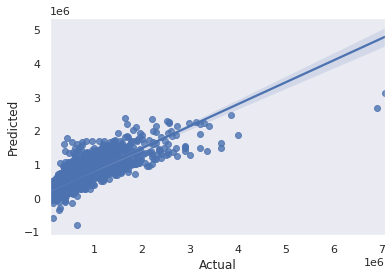

In [51]:
#Plotting our above findings
sns.regplot(dff.Actual, dff.Predicted)

In [52]:
##Lets see how our model performed using r2 scores and model scores

from sklearn.metrics import r2_score

print ('Training_score: ', ml_regressor.score(X_train,y_train))
print ('Test_score: ', r2_score(y_test, y_pred))

Training_score:  0.6559501317449368
Test_score:  0.654872570351335


We can see that our model had a 65% accuracy in predicting values for our house prices. This could be due to high number of X features or other inconsistencies in our data. We can use Lasso/ Ridge or Elastic Regression to regularlize our data features and compare our model perform

** Baseline Lasso regression**

In [53]:
#Import our libraries
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [54]:
A = X_new.copy()
b = y_new.copy()

In [55]:
A.shape

(21610, 17)

In [56]:
b.shape

(21610,)

In [57]:
#Splitting the dataset into training and testing sets

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.3, random_state = 0)

In [58]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [59]:
# Fitting Lasso Regression
# The hyperparameter, α, lets us control how much we penalize the coefficients, 
# with higher values of α creating simpler modelers. The ideal value of α
# should be tuned like any other hyperparameter. In scikit-learn, α
# is set using the alpha parameter.
# 

# Creating lasso regression with default values for lasso
regr = Lasso()

regr.fit(A_train, b_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
# Making Predictions

y_pred_lasso = regr.predict(A_test)

dff_lasso = pd.DataFrame({'Actual': b_test, 'Predicted': y_pred_lasso})

dff_lasso


,Actual,Predicted
9790,680200,625533.191992
10280,550000,443319.083781
21572,230000,231352.323249
20060,379950,500299.523470
21204,1060000,865690.932412
...,...,...
18917,268000,276096.133269
14391,430000,507437.635841
1468,400000,265918.001949
21478,599832,751323.788620


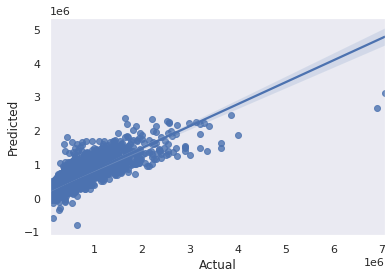

In [61]:
#Lets visualize our results

sns.regplot(dff_lasso.Actual, dff_lasso.Predicted)



In [62]:
#Displaying our metrics

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, y_pred_lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(b_test, y_pred_lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, y_pred_lasso)))

Mean Absolute Error: 139192.02572394235
Mean Squared Error: 48874466668.87121
Root Mean Squared Error: 221075.70347930866


In [63]:
##Lets see how our model performed using r2 scores, lasso coeff and model scores

from sklearn.metrics import r2_score

print ('Training_score: ', regr.score(A_train,b_train))
print ('Test_score: ', r2_score(b_test, y_pred_lasso))
#print("lasso coef:", lasso.coef_) 



Training_score:  0.6559501314876077
Test_score:  0.6548734610594862


The lasso model we just built show an accuraccy of 65% just as our multilinear model. This may be because this was the baseline model / we have not tweaked the hyperparameters

**Normalize Lasso regression**

In [64]:
#importing our libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")



In [65]:
# Creating lasso regression with tweaked values of alpha value
#regr = Lasso(alpha=0.5)
regr_2 = Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

regr_2.fit(A_train, b_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [66]:
y_pred_lasso = regr_2.predict(A_test)

dff_lasso_2 = pd.DataFrame({'Actual': b_test, 'Predicted': y_pred_lasso})

dff_lasso_2.head(10)

,Actual,Predicted
9790,680200,625314.604774
10280,550000,443457.951188
21572,230000,231553.602238
20060,379950,500472.413435
21204,1060000,865684.157458
14544,325250,361681.980012
15937,279000,473706.554255
1710,453000,492006.190274
12659,158000,267691.860436
21184,468500,354094.552693


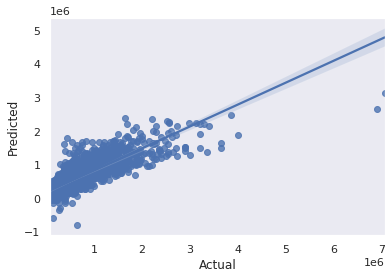

In [67]:
#Lets visualize our results

sns.regplot(dff_lasso_2.Actual, dff_lasso_2.Predicted)

In [68]:
#Displaying our metrics

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, y_pred_lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(b_test, y_pred_lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, y_pred_lasso)))

Mean Absolute Error: 139173.28313379985
Mean Squared Error: 48869733543.90773
Root Mean Squared Error: 221064.99845952034


In [69]:
##Lets see how our model performed using r2 scores, lasso coeff and model scores

from sklearn.metrics import r2_score

print ('Training_score: ', regr.score(A_train,b_train))
print ('Test_score: ', r2_score(b_test, y_pred_lasso))


Training_score:  0.6559501314876077
Test_score:  0.6549068839722739


From our results we realize there is not much difference in the accuracy percentages of our training and test scores. This could mean that there is no case of overfitting or underfitting in our model

**Baseline Ridge Regression**

In [70]:
##Importing our libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [71]:
A_train.shape

(15127, 17)

In [72]:
b_train.shape

(15127,)

In [73]:
A_test.shape

(6483, 17)

In [74]:
b_test.shape

(6483,)

In [75]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 

regression_ridge = Ridge()
regression_ridge.fit(A_train,b_train)



Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
# Making Predictions

y_pred_ridge = regression_ridge.predict(A_test)

dff_ridge = pd.DataFrame({'Actual': b_test, 'Predicted': y_pred_ridge})

dff_ridge.head(10)



,Actual,Predicted
9790,680200,625502.882748
10280,550000,443323.216566
21572,230000,231355.828365
20060,379950,500319.276560
21204,1060000,865681.307547
14544,325250,361591.454312
15937,279000,473649.427537
1710,453000,492180.828348
12659,158000,267485.350864
21184,468500,354087.382622


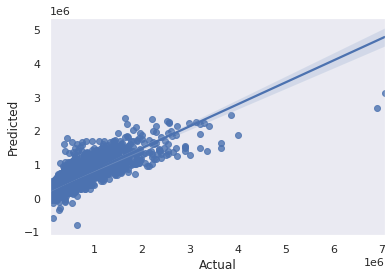

In [77]:
sns.regplot(dff_ridge.Actual, dff_ridge.Predicted)

In [78]:
#Displaying our metrics

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, y_pred_ridge))  
print('Mean Squared Error:', metrics.mean_squared_error(b_test, y_pred_ridge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, y_pred_ridge)))

Mean Absolute Error: 139190.3748782229
Mean Squared Error: 48874454887.76287
Root Mean Squared Error: 221075.67683434303


In [79]:
##Lets see how our model performed using r2 scores, lasso coeff and model scores

from sklearn.metrics import r2_score

print ('Training_score: ', regression_ridge.score(A_train,b_train))
print ('Test_score: ', r2_score(b_test, y_pred_ridge))


Training_score:  0.655950128847496
Test_score:  0.6548735442516604


**Normalized Ridge regression** 

In [80]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [81]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(A_train,b_train)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

45746733192.74923

In [82]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(A_train,b_train)


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [83]:
# Making Predictions

y_pred_ridge_2 = ridge.predict(A_test)

dff_ridge_2 = pd.DataFrame({'Actual': b_test, 'Predicted': y_pred_ridge_2})

dff_ridge_2.head(10)

,Actual,Predicted
9790,680200,621538.982659
10280,550000,443384.924621
21572,230000,232772.495198
20060,379950,503522.575686
21204,1060000,863922.091882
14544,325250,367607.498003
15937,279000,471910.943431
1710,453000,493460.309664
12659,158000,266980.317991
21184,468500,354982.681937


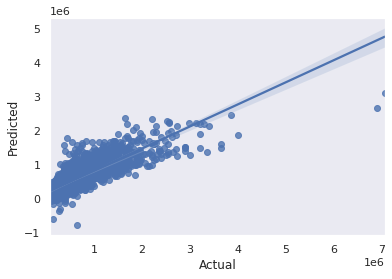

In [84]:
sns.regplot(dff_ridge_2.Actual, dff_ridge_2.Predicted)

In [85]:
#Displaying our metrics

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, y_pred_ridge_2))  
print('Mean Squared Error:', metrics.mean_squared_error(b_test, y_pred_ridge_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, y_pred_ridge_2)))

Mean Absolute Error: 138966.86424198397
Mean Squared Error: 48863144173.84297
Root Mean Squared Error: 221050.09426336596


In [86]:
##Lets see how our model performed using r2 scores, and model scores

from sklearn.metrics import r2_score

print ('Training_score: ', ridge.score(A_train,b_train))
print ('Test_score: ', r2_score(b_test, y_pred_ridge_2))

Training_score:  0.6558877697314311
Test_score:  0.6549534147405718


The training and test score seem close to each of the models we've built so far, the poor performance in our models could be due to poor feature selection and alpha metric selection

**Baseline Elastic Net Model**

In [87]:
##Elatic Net Model combines both L1 and L2 regularization


In [88]:
S_train= A_train.copy()
S_test= A_test.copy()
j_test = b_test.copy()
j_train = b_train.copy()

In [89]:
S_train.shape

(15127, 17)

In [90]:
j_train.shape

(15127,)

In [91]:
j_test.shape

(6483,)

In [92]:
S_train.shape

(15127, 17)

In [93]:
#Importing our libraries

from sklearn.linear_model import ElasticNet

In [94]:
#Instanciating our model

elastic= ElasticNet()
elastic.fit(S_train ,j_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
#Making predictions

y_pred_elastic = elastic.predict(S_test)

dff_elastic = pd.DataFrame({'Actual': j_test, 'Predicted': y_pred_elastic})

dff_elastic.head(10)

,Actual,Predicted
9790,680200,537044.547107
10280,550000,455223.536648
21572,230000,291652.818905
20060,379950,567155.533190
21204,1060000,819591.437872
14544,325250,474429.984226
15937,279000,456801.963892
1710,453000,503282.821835
12659,158000,284525.706642
21184,468500,393920.685547


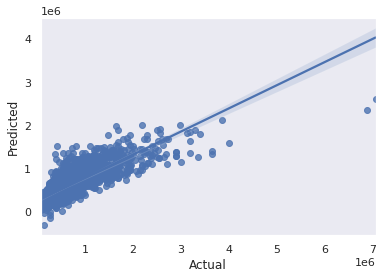

In [96]:
sns.regplot(dff_elastic.Actual, dff_elastic.Predicted)

In [97]:
#Displaying our metrics

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(j_test, y_pred_elastic))  
print('Mean Squared Error:', metrics.mean_squared_error(j_test, y_pred_elastic))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(j_test, y_pred_elastic)))

Mean Absolute Error: 140888.40384083329
Mean Squared Error: 53329890829.4702
Root Mean Squared Error: 230932.6543160802


In [98]:
##Lets see how our model performed using r2 scores, and model scores

from sklearn.metrics import r2_score

print ('Training_score: ', elastic.score(S_train,j_train))
print ('Test_score: ', r2_score(j_test, y_pred_elastic))

Training_score:  0.6217858589278404
Test_score:  0.6234115296080921


**Normalized ElasticNet Regression**

In [99]:
#Tweaking our alpha values. If we take alpha = 0, it will become Ridge and alpha = 1 is LASSO and anything between 0–1 is Elastic net.
elastic_2= ElasticNet(alpha=0.6,normalize=True)
elastic_2.fit(S_train ,j_train)

ElasticNet(alpha=0.6, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
#Making predictions

y_pred_elastic_2 = elastic_2.predict(S_test)

dff_elastic_2 = pd.DataFrame({'Actual': j_test, 'Predicted': y_pred_elastic_2})

dff_elastic_2.head(10)

,Actual,Predicted
9790,680200,538362.254312
10280,550000,538375.572679
21572,230000,538274.192908
20060,379950,538621.569360
21204,1060000,538831.705957
14544,325250,538448.630990
15937,279000,538388.921981
1710,453000,538374.917355
12659,158000,538195.631146
21184,468500,538372.513424


In [101]:
#Displaying our metrics

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(j_test, y_pred_elastic_2))  
print('Mean Squared Error:', metrics.mean_squared_error(j_test, y_pred_elastic_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(j_test, y_pred_elastic_2)))

Mean Absolute Error: 238106.1419910534
Mean Squared Error: 141496616335.85873
Root Mean Squared Error: 376160.3598677813


In [102]:
##Lets see how our model performed using r2 scores, and model scores

from sklearn.metrics import r2_score

print ('Training_score: ', elastic_2.score(S_train,j_train))
print ('Test_score: ', r2_score(j_test, y_pred_elastic_2))

Training_score:  0.001060012555908374
Test_score:  0.0008231128403932697


Of all the models we worked with the normalized elastic net had the lowest r2 scores hence can conclude performed the worst. This could be due to our tweaked parameters.

**Quantile regression**

In [103]:
#Importing our models

from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf


In [104]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [106]:
# Summary report of dataset at different Quantile

#mod = smf.quantreg('price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+long+sqft_living15+sqft_lot15', df)
#res = mod.fit(.75)
#print(res.summary())

#We reduced our feature numbers

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living +sqft_lot +floors +waterfront +view +condition +grade +sqft_above ',df)
quantiles = np.arange(0.1,1,0.1) 
models = []
for qt in quantiles: 
	res = mod.fit(q = qt )
print(res.summary())
#print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4703
Model:                       QuantReg   Bandwidth:                   2.743e+04
Method:                 Least Squares   Sparsity:                    1.253e+06
Date:                Fri, 23 Jul 2021   No. Observations:                21610
Time:                        21:13:23   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.497e+05   3.74e+04    -14.694      0.000   -6.23e+05   -4.76e+05
bedrooms    -4.328e+04   5025.859     -8.612      0.000   -5.31e+04   -3.34e+04
bathrooms    3310.6482   5667.862      0.584      0.559   -7798.780    1.44e+04
sqft_living   251.4397      8.513     29.537   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [107]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [108]:
X= df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above']]
y= df.price       



In [109]:
X.shape

(21610, 10)

In [110]:
y.shape

(21610,)

In [111]:
#Making predictions
y_pred_quantile = res.predict(X)

y_pred_quantile

0        481724.188737
1        771230.867134
2        309339.005560
3        734566.669158
4        721238.381642
             ...      
21608    565075.956044
21609    775028.418872
21610    422684.288969
21611    642523.132117
21612    422759.729731
Length: 21610, dtype: float64

**Residual Plots and Heteroscedasticity**

In [112]:
##ML regression

#Obtaining our residuals by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_pred, y_test)
residuals
# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

print('***************')
print("The Residual mean for the model : ", residuals.mean())

              price
count  6.483000e+03
mean  -4.805648e+03
std    2.210408e+05
min   -4.221711e+06
25%   -9.241642e+04
50%    5.226827e+03
75%    1.026307e+05
max    1.377615e+06
***************
The Residual mean for the model :  -4805.648102769633


The residual mean tells us that there may be patterns that we may not have identified or that a linear regression is not the best model for our data

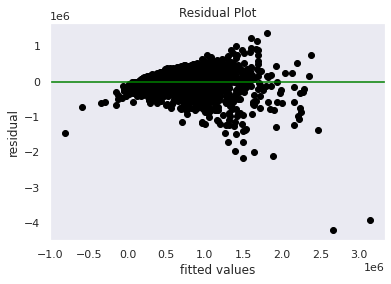

In [113]:
# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

In [114]:
##Lasso Regression

residuals = np.subtract(y_pred_lasso, b_test)
residuals
# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

print('***************')
print("The Residual mean for the model : ", residuals.mean())

              price
count  6.483000e+03
mean  -4.800142e+03
std    2.210299e+05
min   -4.222007e+06
25%   -9.250448e+04
50%    5.168995e+03
75%    1.027076e+05
max    1.376541e+06
***************
The Residual mean for the model :  -4800.1416223003025


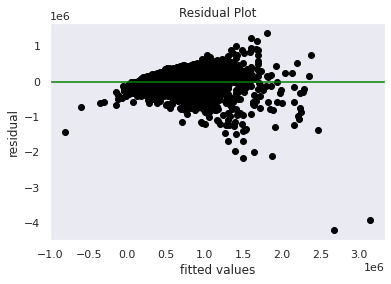

In [115]:
# Plotting the prediction errors

plt.scatter(y_pred_lasso, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

In [116]:
##Ridge Regression

residuals = np.subtract(y_pred_ridge, b_test)
residuals
# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

print('***************')
print("The Residual mean for the model : ", residuals.mean())

              price
count  6.483000e+03
mean  -4.805706e+03
std    2.210405e+05
min   -4.221768e+06
25%   -9.241221e+04
50%    5.220570e+03
75%    1.026492e+05
max    1.377559e+06
***************
The Residual mean for the model :  -4805.705598070966


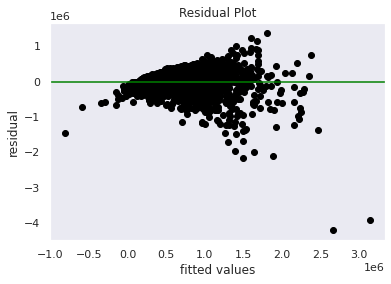

In [117]:
# Plotting the prediction errors

plt.scatter(y_pred_ridge, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

In [118]:
##Elastic Net Regression Model

residuals = np.subtract(y_pred_elastic, j_test)
residuals
# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

print('***************')
print("The Residual mean for the model : ", residuals.mean())

              price
count  6.483000e+03
mean  -5.101773e+03
std    2.308941e+05
min   -4.538072e+06
25%   -8.327973e+04
50%    1.565318e+04
75%    1.156256e+05
max    1.095869e+06
***************
The Residual mean for the model :  -5101.772889437727


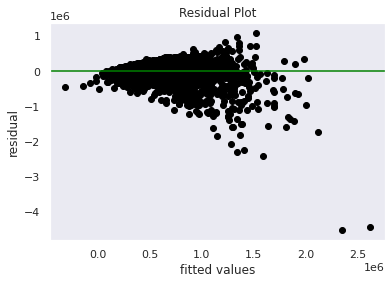

In [119]:
plt.scatter(y_pred_elastic, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

#**Challenging & Providing Recommendations**

From the above analysis and prediction algorithms, we realize that our models performed with an almost similar accuracy with little variance bteween the score percentages. There could be a number of factors that led to these one which might be feature selection as stated earlier. Some of the features have less than 70% of data but we still chose to use them which may have caused this variation. There might also have been some multicolinearity and variance caused by our decision to keep the outliers.
Our reqularization models did not also have accuracy changes when we tweaked different parameters.



We are yet to explore other machine learning models which might have provided better accuracy for our models.